In [1]:
!pip install umap-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np       #Mathematical Computations and Data Analytics Tasks
import pandas as pd      #Data manipulation and analysis
from sklearn.preprocessing import MinMaxScaler   #Scales features to a fixed range, typically between 0 and 1
import seaborn as sns                 #Built on matplotlib, offering attractive statistical graphics.
from sklearn.model_selection import train_test_split  #Splits datasets into random train and test subsets
import matplotlib.pyplot as plt     #Creating static, animated, and interactive visualizations.
from sklearn.feature_selection import SelectKBest   #Selects features according to the k highest scores
from IPython.display import HTML   #Displays HTML content in Jupyter notebooks.
from sklearn.decomposition import PCA    #for dimensionality reduction
from sklearn.feature_selection import f_classif   #ANOVA F-value for the provided sample
import umap        #For dimension reduction
from sklearn.manifold import TSNE       #t-distributed Stochastic Neighbor Embedding for visualization
import math
from sklearn.neural_network import MLPClassifier      #Multi-layer Perceptron classifier
from sklearn.model_selection import GridSearchCV      #Exhaustive search over specified parameter values for an estimator.
from sklearn.metrics import confusion_matrix       #Compute confusion matrix to evaluate classification accuracy
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold      #Tools for cross-validation
from sklearn.ensemble import RandomForestClassifier        #Tools for cross-validation
import tensorflow as tf        #Framework
from tensorflow.keras.optimizers import SGD    #optimizer
from tensorflow.keras.callbacks import EarlyStopping     #Stops training when a monitored metric has stopped improving
from sklearn.metrics import accuracy_score   #Calculated accuracy

rng = np.random.RandomState(0)

In [3]:
df = pd.read_csv('creditcard_2023.csv')

Drop id as it will not useful information

In [4]:
df = df.drop(columns=['id']) #drop id column

In [5]:
df.shape

(568630, 30)

Checking null values and datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

Checking infinite value

In [7]:
df.isin([np.inf, -np.inf]).values.sum()

0

Checking whether data is skewed.

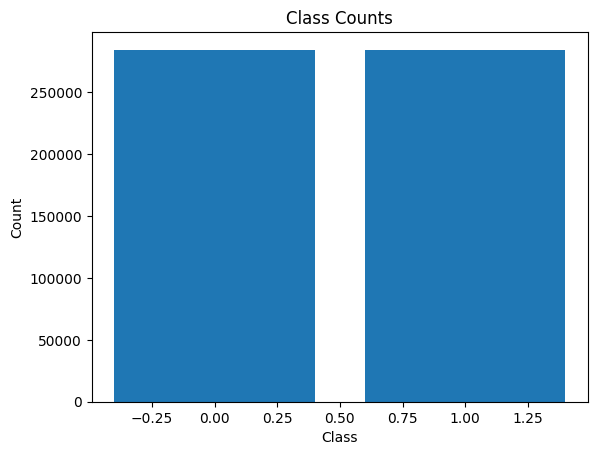

In [8]:
df2 = df.groupby(['Class'])['Class'].count()
class_counts = df.groupby(['Class'])['Class'].count()

# Plot the counts
plt.bar(class_counts.index, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

In [9]:
print(df2)

Class
0    284315
1    284315
Name: Class, dtype: int64


Data is well distributed.

Save as X and Y for future usage

In [10]:
X = df.drop(columns=['Class'])
Y = df.loc[:, ['Class']]

Exploring distribution of the data

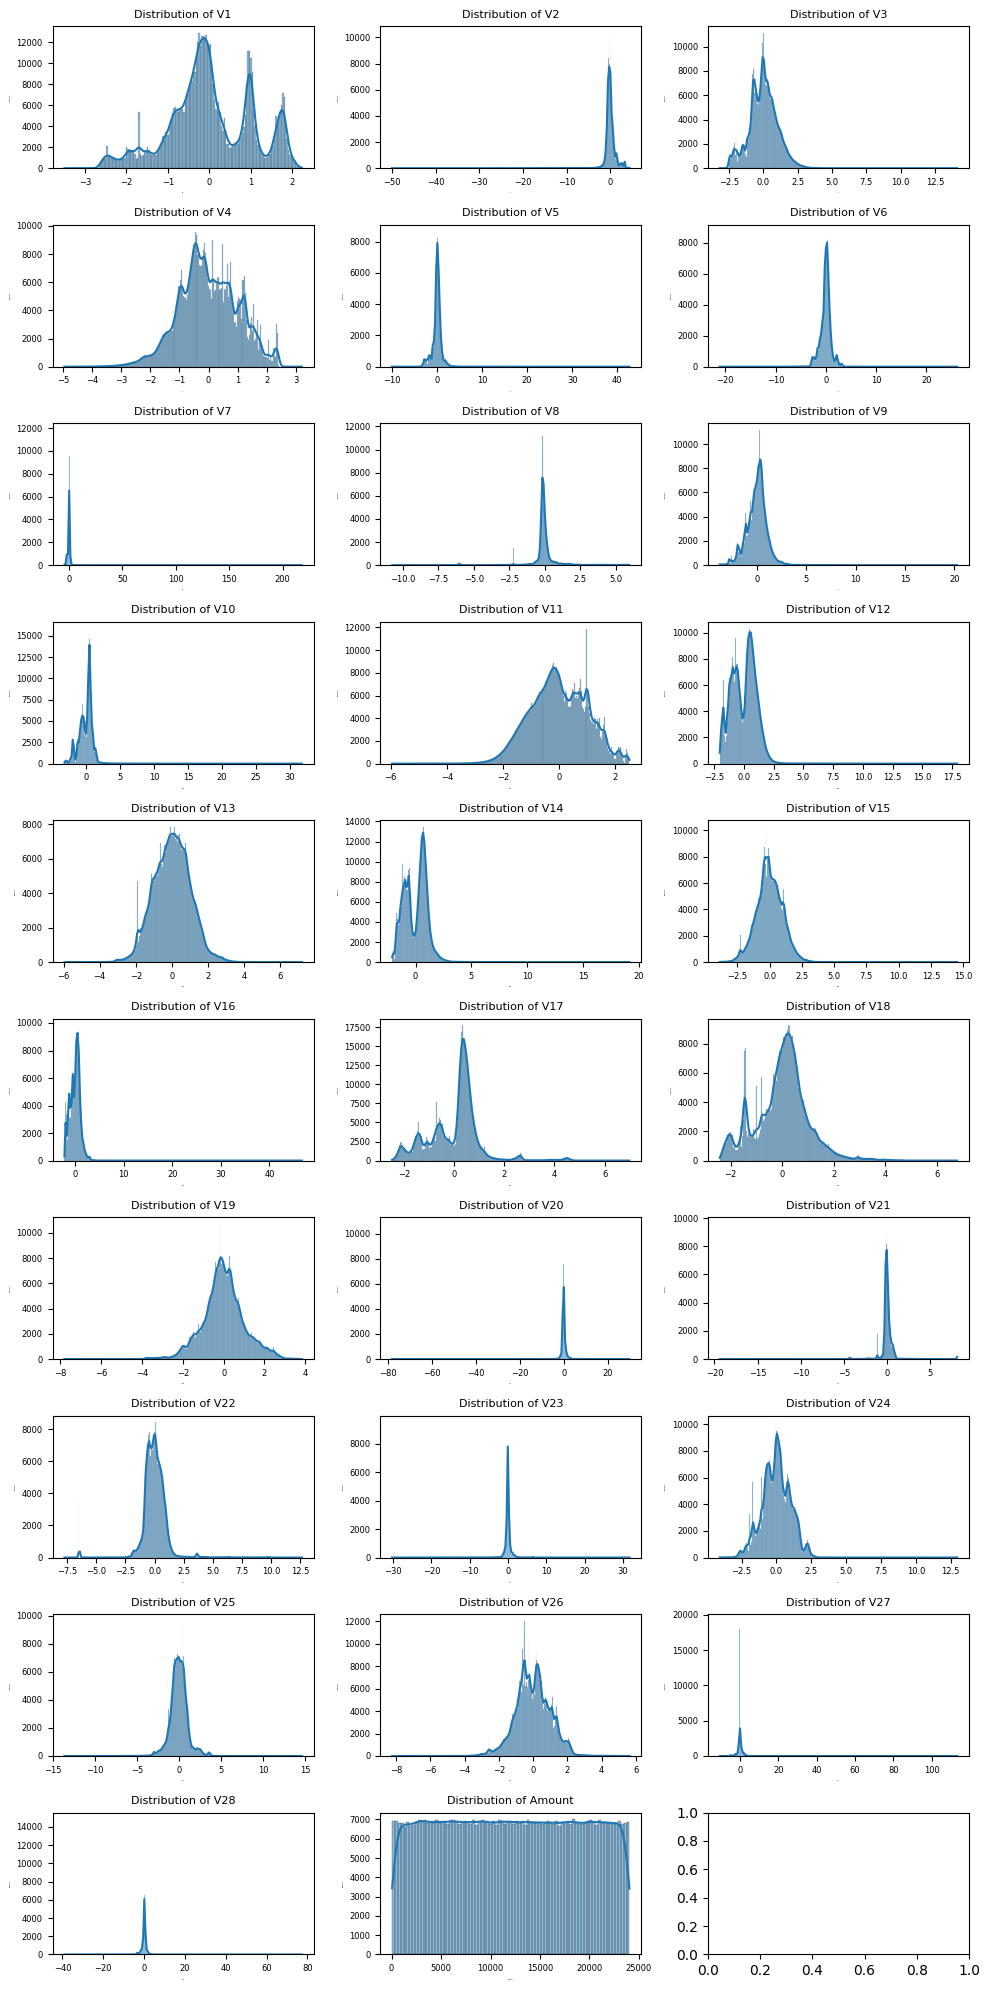

In [11]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 20))

axes = axes.flatten()
for i, column in enumerate(X.columns):
    sns.histplot(X[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}', fontsize=8)
    axes[i].set_xlabel(column, fontsize=0)
    axes[i].set_ylabel('Frequency', fontsize=0)
    axes[i].tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

Try excluding low variance feature.

Since every columns except for amount is already standardized, we could not find low variance feature

In [12]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000


Scale data to see correlation between features

Use minmax standardization for neural network

In [13]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_df = pd.DataFrame(scaler.transform(X))
scaled_df.columns=X.columns

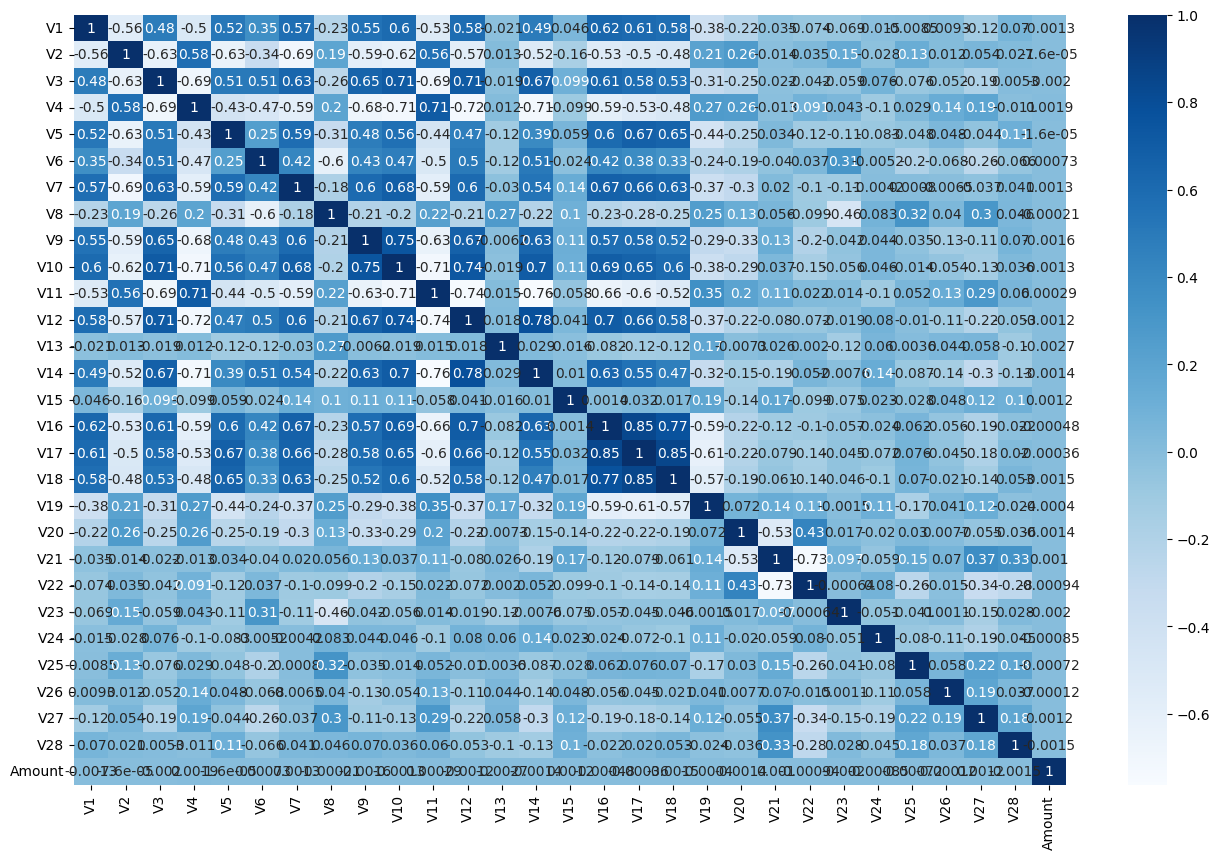

In [14]:
corr_matrix = scaled_df.corr()
plt.figure(figsize=[16,10])
heatmap = sns.heatmap(corr_matrix,cmap='Blues',annot=True)

V12, V14

V16, V17 and V18 are highly correlated

V9, V10 are highly correlated

Drop highly correlated features

V14, V17, V18 and V10

In [15]:
scaled_df = scaled_df.drop(columns = ['V14', 'V17', 'V18', 'V10'])

Check correlation with target

In [16]:
print(scaled_df.corrwith(df['Class']))

V1       -0.505761
V2        0.491878
V3       -0.682095
V4        0.735981
V5       -0.338639
V6       -0.435088
V7       -0.491234
V8        0.144294
V9       -0.585522
V11       0.724278
V12      -0.768579
V13      -0.071105
V15      -0.037948
V16      -0.573511
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24      -0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
dtype: float64


normal 6:2:2

As data is balanced and large

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, Y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
print(f"X train shape: ", X_train.shape)
print(f"y train shape: ", y_train.shape)
print(f"X val shape: ", X_val.shape)
print(f"y val shape: ", y_val.shape)
print(f"X test shape: ", X_test.shape)
print(f"y test shape: ", y_test.shape)

X train shape:  (341178, 25)
y train shape:  (341178, 1)
X val shape:  (113726, 25)
y val shape:  (113726, 1)
X test shape:  (113726, 25)
y test shape:  (113726, 1)


Visualize with smaller dataset

In [18]:
input_X = X_train[:math.ceil(len(X_train)*0.1)]
input_y = y_train[:math.ceil(len(X_train)*0.1)]
input_X.shape

(34118, 25)

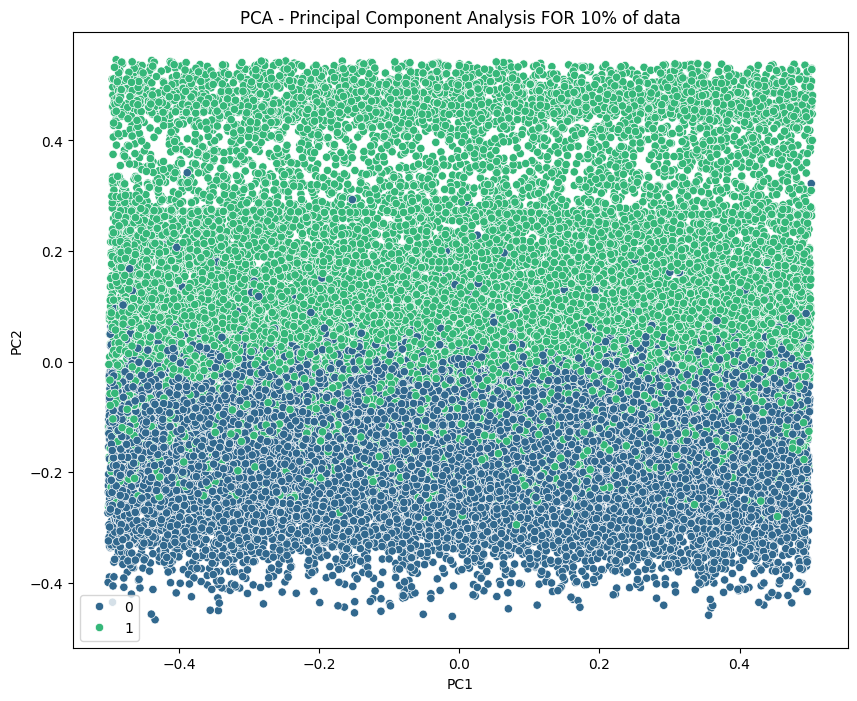

In [19]:
#PCA - Principal Component Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(input_X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=input_y.values.flatten(), data=pca_df, palette='viridis')
plt.title("PCA - Principal Component Analysis FOR 10% of data")
plt.show()

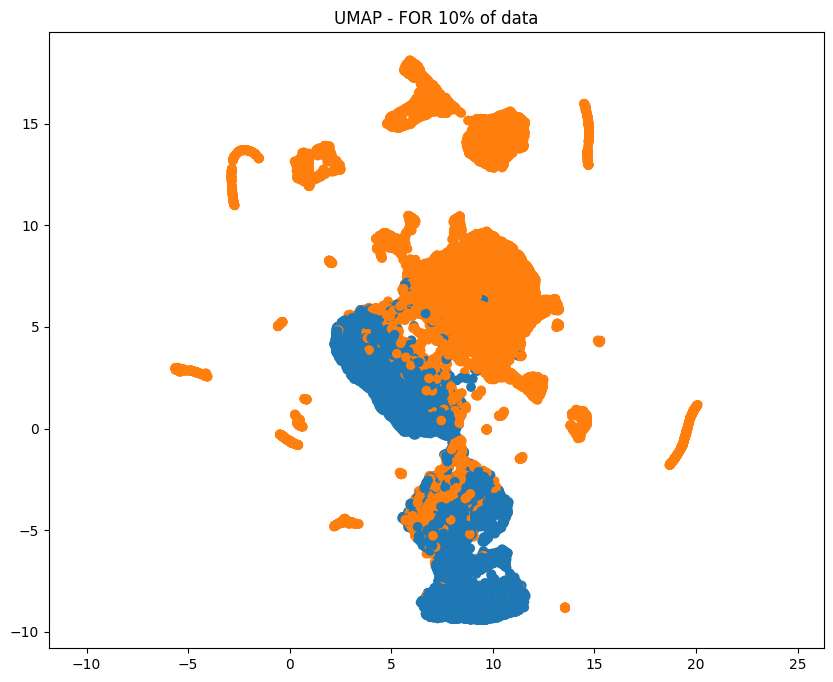

In [20]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(input_X)
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in input_y.Class.map({0:0, 1:1})])
plt.title("UMAP - FOR 10% of data")
plt.gca().set_aspect('equal', 'datalim')

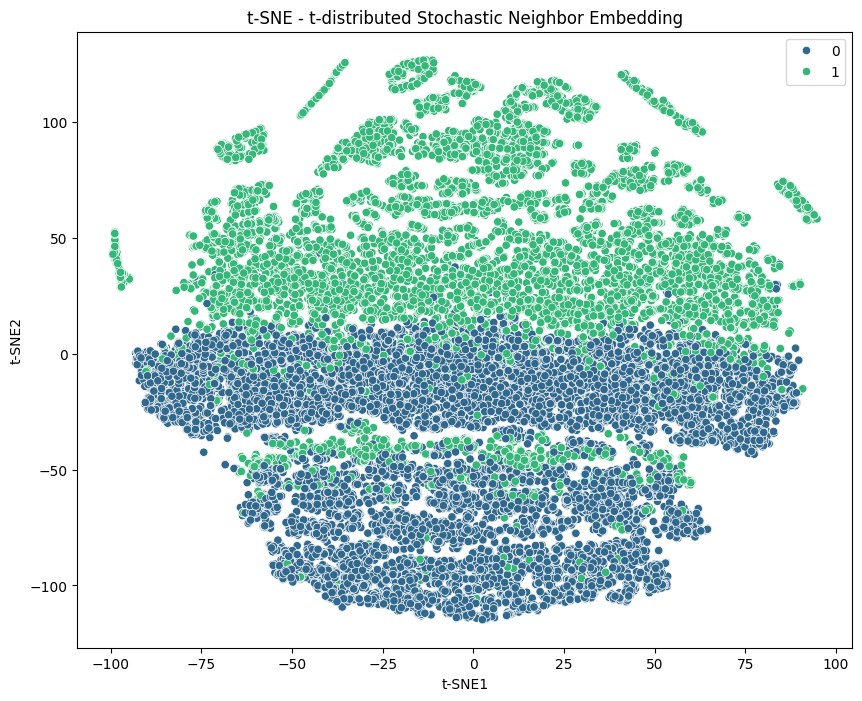

In [21]:
#  t-SNE - t-distributed Stochastic Neighbor Embedding
tsne_model = TSNE(n_components=2)
tsne_result = tsne_model.fit_transform(input_X)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=input_y.values.flatten(), data=tsne_df, palette='viridis')
plt.title("t-SNE - t-distributed Stochastic Neighbor Embedding")
plt.show()

Neural network

log loss(binary cross entropy) is used for loss function

L2 regularization term is divided by the sample size when added to the loss.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Try with 5% of train set

In [22]:
small_X = X_train[:math.ceil(len(X_train)*0.05)]
small_y = y_train[:math.ceil(len(X_train)*0.05)]
small_X.shape

(17059, 25)

In [23]:
clf_nn = MLPClassifier(hidden_layer_sizes=2, activation='relu', solver='sgd',
                       batch_size=50, learning_rate_init=0.01, max_iter = 200,
                       validation_fraction = 0.25, early_stopping=True).fit(small_X, np.ravel(small_y))

In [24]:
clf_nn.score(X_val, y_val)

0.9470042030846069

Test on test set

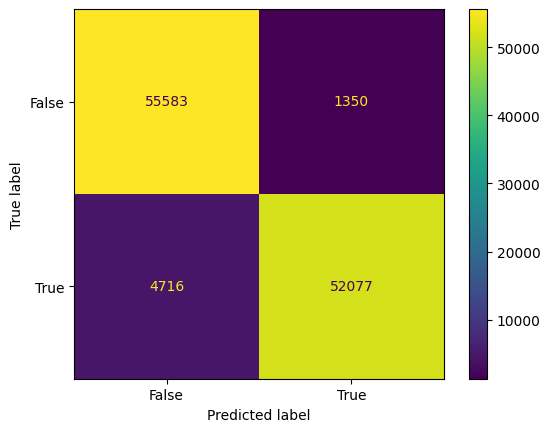

In [25]:
confusion_matrix2 = confusion_matrix(y_test, clf_nn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp

Use grid search to get optimal hyperparameter such as

Hidden_layer_sizes,

Activation,

Batch_size,

Learning_rate_init,

Max_iter

In [26]:
param_grid = {
    'hidden_layer_sizes':[(3, 32), (5, 32)],
    'activation':['relu', 'identity'],
    'batch_size':[200, 300],
    'learning_rate_init':[0.01, 0.005],
    'max_iter':[200, 300]
    }

In [27]:
clf_nn_param = MLPClassifier(solver='sgd', validation_fraction = 0.25, early_stopping=True, random_state=rng)
grid_search = GridSearchCV(estimator=clf_nn_param, param_grid=param_grid)
grid_search.fit(small_X, np.ravel(small_y))

best_params = grid_search.best_params_
print(best_params)

{'activation': 'identity', 'batch_size': 200, 'hidden_layer_sizes': (3, 32), 'learning_rate_init': 0.005, 'max_iter': 200}


Evaluate tuned hyperparameters in validation sets

In [28]:
clf_nn2 = MLPClassifier(hidden_layer_sizes=(5, 32), activation='identity', solver='sgd',
                        batch_size=200, learning_rate_init=0.01, max_iter = 200,
                        validation_fraction = 0.25, early_stopping=True).fit(small_X, np.ravel(small_y))

In [29]:
clf_nn2.score(X_val, y_val)

0.949598156973779

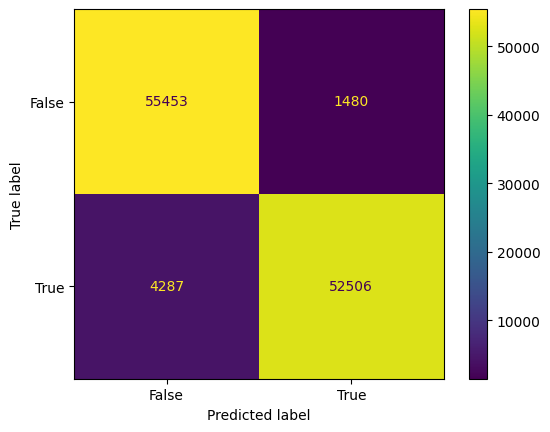

In [30]:
confusion_matrix2 = confusion_matrix(y_test, clf_nn2.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp

Got decreased accuracy.

Check with other small datasets whether tuned hyperparameters overfitted this specific small dataset

In [31]:
losses = []
accuracys = []
for i in range(20):
    set_size = math.ceil(len(X_train)*0.05)
    grid_X = X_train[set_size*i:set_size*(i+1)]
    grid_y = y_train[set_size*i:set_size*(i+1)]
    clf_nn2 = MLPClassifier(hidden_layer_sizes=(5, 32), activation='relu', solver='sgd',
                            batch_size=200, learning_rate_init=0.01, max_iter = 300,
                            validation_fraction = 0.25, early_stopping=True).fit(input_X, np.ravel(input_y))
    score = clf_nn2.score(X_val, y_val)
    print(f"set{i+1} accuracy: {np.round(score, 4)}")
    losses.append(clf_nn2.loss_curve_)
    accuracys.append(clf_nn2.validation_scores_)

set1 accuracy: 0.9503
set2 accuracy: 0.9499
set3 accuracy: 0.9504
set4 accuracy: 0.9501
set5 accuracy: 0.9502
set6 accuracy: 0.9481
set7 accuracy: 0.9508
set8 accuracy: 0.9501
set9 accuracy: 0.9508
set10 accuracy: 0.9556
set11 accuracy: 0.9514
set12 accuracy: 0.9523
set13 accuracy: 0.9502
set14 accuracy: 0.9494
set15 accuracy: 0.9559
set16 accuracy: 0.9504
set17 accuracy: 0.9503
set18 accuracy: 0.95
set19 accuracy: 0.9504
set20 accuracy: 0.9499


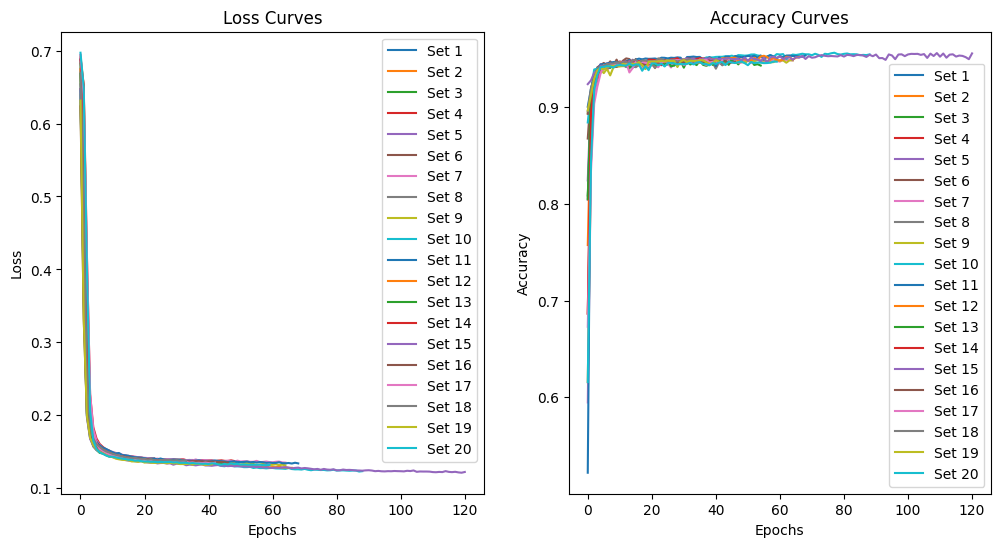

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, loss_curve in enumerate(losses):
    plt.plot(loss_curve, label=f'Set {i + 1}')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for i, accuracy_curve in enumerate(accuracys):
    plt.plot(accuracy_curve, label=f'Set {i + 1}')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Accuracy and loss seems to be consistent for most sets. However one of the small set got extremely low accuracy, high loss.

We thought this may be due to small batch size which might have include only one type of target

Therefore, we tried increasing batch size to 400 with 5 fold with whole training, validation dataset.

In [33]:
clf_nn = MLPClassifier(hidden_layer_sizes=(5, 32), activation='identity', solver='sgd',
                      batch_size=400, learning_rate_init=0.01, max_iter=200,
                      validation_fraction=0.25, early_stopping=True)

# Create a 5-fold cross-validation object
kf = KFold(n_splits=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf_nn, X_train, np.ravel(y_train), cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Mean accuracy:", np.round(np.mean(cv_scores), 4))

Cross-validation scores: [0.9517 0.9518 0.9512 0.9511 0.951 ]
Mean accuracy: 0.9514


Pitfall 1: Try in more complex model

Since there were limits using sklearn neural network model, we tried tenserflow for more complex model

Adding more neurons

Adding dropout rate set to 0.2

Using larger batch size

In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=210, input_shape=(X_train.shape[1],), activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(110, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])
#, kernel_regularizer=regularizers.l2(0.01)

d:\Software\System Tools Software\Python on 20th April 2024\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss',
                               patience=2,
                               restore_best_weights=True)

In [36]:
model.fit(X_train, np.ravel(y_train), batch_size=400, epochs=300, validation_data=(X_val, np.ravel(y_val)), callbacks=[early_stopping])

Epoch 1/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7346 - loss: 0.5229 - val_accuracy: 0.9308 - val_loss: 0.1948
Epoch 2/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9301 - loss: 0.1943 - val_accuracy: 0.9432 - val_loss: 0.1550
Epoch 3/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9410 - loss: 0.1615 - val_accuracy: 0.9451 - val_loss: 0.1467
Epoch 4/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9441 - loss: 0.1520 - val_accuracy: 0.9451 - val_loss: 0.1438
Epoch 5/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9438 - loss: 0.1497 - val_accuracy: 0.9471 - val_loss: 0.1405
Epoch 6/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9454 - loss: 0.1462 - val_accuracy: 0.9456 - val_loss: 0.1402
Epoch 7/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9457 - loss: 0.1444 - val_accuracy: 0.9465 - val_loss: 0.1372
Epoch 8/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9473 - loss: 0.1398 - val_accu

In [37]:
predictions = model.predict(X_test)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 726us/step


In [38]:
predicted_labels = (predictions > 0.5).astype(int)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.06%


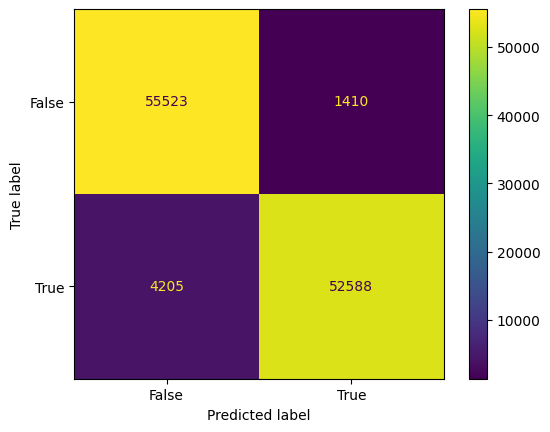

In [39]:
confusion_mat = confusion_matrix(y_test, predicted_labels)
confusion_matrix3 = confusion_matrix(y_test, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()

Pitfall 2:Runtime -> try reducing feature



In [40]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rng)
rf_classifier.fit(X_train, np.ravel(y_train))
feature_importances = rf_classifier.feature_importances_

Feature Importance:
   Feature  Importance
3       V4    0.180059
10     V12    0.171272
13     V16    0.129270
2       V3    0.098366
9      V11    0.094671
6       V7    0.065129
1       V2    0.045194
8       V9    0.031440
16     V21    0.022204
5       V6    0.017710
0       V1    0.016998
22     V27    0.015213
14     V19    0.014903
4       V5    0.013514
7       V8    0.012575
23     V28    0.011057
15     V20    0.009402
11     V13    0.009130
19     V24    0.007731
18     V23    0.007645
20     V25    0.007479
12     V15    0.006887
21     V26    0.006235
17     V22    0.005789
24  Amount    0.000128


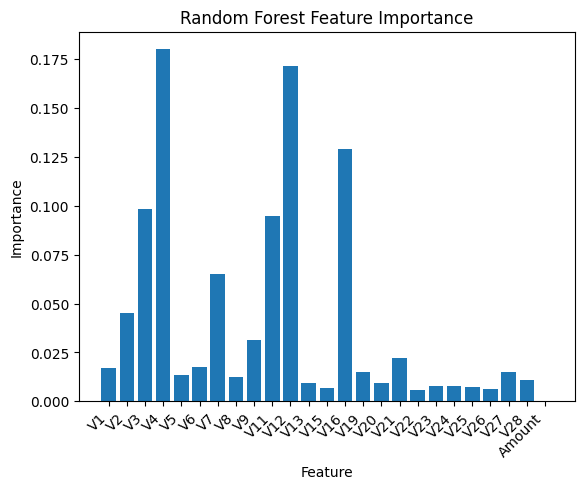

In [41]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

plt.bar(range(X_train.shape[1]), feature_importances)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [42]:
high_importance = feature_importance_df[feature_importance_df['Importance'] > 0.01]

In [43]:
selected_features = high_importance['Feature'].tolist()
X_selected = X_train[selected_features]

In [44]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=210, input_shape=(X_selected.shape[1],), activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(110, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

d:\Software\System Tools Software\Python on 20th April 2024\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
sgd_optimizer = SGD(learning_rate=0.01)

model2.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss',
                               patience=2,
                               restore_best_weights=True)

In [46]:
model2.fit(X_selected, np.ravel(y_train), batch_size=400, epochs=300, validation_data=(X_val[selected_features], np.ravel(y_val)), callbacks=[early_stopping])

Epoch 1/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7638 - loss: 0.5052 - val_accuracy: 0.9294 - val_loss: 0.2006
Epoch 2/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9280 - loss: 0.1974 - val_accuracy: 0.9441 - val_loss: 0.1571
Epoch 3/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9408 - loss: 0.1631 - val_accuracy: 0.9456 - val_loss: 0.1482
Epoch 4/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9440 - loss: 0.1531 - val_accuracy: 0.9451 - val_loss: 0.1443
Epoch 5/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9445 - loss: 0.1497 - val_accuracy: 0.9462 - val_loss: 0.1415
Epoch 6/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9455 - loss: 0.1452 - val_accuracy: 0.9462 - val_loss: 0.1400
Epoch 7/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9457 - loss: 0.1449 - val_accuracy: 0.9479 - val_loss: 0.1416
Epoch 8/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9464 - loss: 0.1423 - val_accu

In [47]:
predictions = model2.predict(X_test[selected_features])

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 757us/step


In [48]:
predicted_labels = (predictions > 0.5).astype(int)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.02%


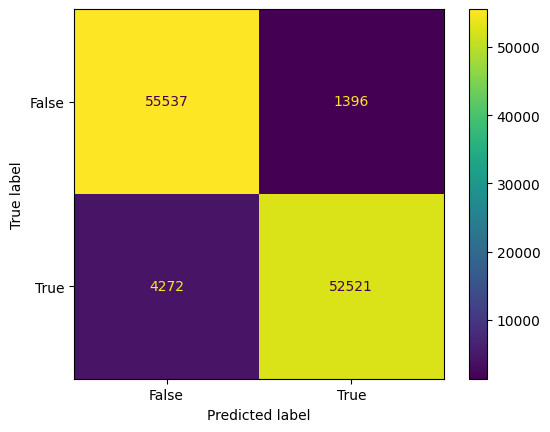

In [49]:
confusion_mat = confusion_matrix(y_test, predicted_labels)
confusion_matrix3 = confusion_matrix(y_test, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()

In [50]:
X.shape

(568630, 29)

Pitfall 3: Try with original dataset

In [51]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_df2 = pd.DataFrame(scaler.transform(X))
scaled_df2.columns=X.columns

In [52]:
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(scaled_df2, Y, test_size=0.4)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5)
print(f"X train shape: ", X_train2.shape)
print(f"y train shape: ", y_train2.shape)
print(f"X val shape: ", X_val2.shape)
print(f"y val shape: ", y_val2.shape)
print(f"X test shape: ", X_test2.shape)
print(f"y test shape: ", y_test2.shape)

X train shape:  (341178, 29)
y train shape:  (341178, 1)
X val shape:  (113726, 29)
y val shape:  (113726, 1)
X test shape:  (113726, 29)
y test shape:  (113726, 1)


In [53]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=210, input_shape=(X_train2.shape[1],), activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(110, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

d:\Software\System Tools Software\Python on 20th April 2024\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
sgd_optimizer = SGD(learning_rate=0.01)

model4.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss',
                               patience=2,
                               restore_best_weights=True)

In [55]:
model4.fit(X_train2, np.ravel(y_train2), batch_size=400, epochs=300, validation_data=(X_val2, np.ravel(y_val2)), callbacks=[early_stopping])

Epoch 1/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7384 - loss: 0.5158 - val_accuracy: 0.9272 - val_loss: 0.1897
Epoch 2/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9329 - loss: 0.1843 - val_accuracy: 0.9470 - val_loss: 0.1425
Epoch 3/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9460 - loss: 0.1475 - val_accuracy: 0.9489 - val_loss: 0.1315
Epoch 4/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9495 - loss: 0.1346 - val_accuracy: 0.9503 - val_loss: 0.1254
Epoch 5/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9508 - loss: 0.1293 - val_accuracy: 0.9518 - val_loss: 0.1220
Epoch 6/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9523 - loss: 0.1254 - val_accuracy: 0.9530 - val_loss: 0.1190
Epoch 7/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9534 - loss: 0.1214 - val_accuracy: 0.9537 - val_loss: 0.1174
Epoch 8/300
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9542 - loss: 0.1194 - val_acc

In [56]:
predictions = model4.predict(X_test2)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 818us/step


In [57]:
predicted_labels = (predictions > 0.5).astype(int)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test2, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.10%


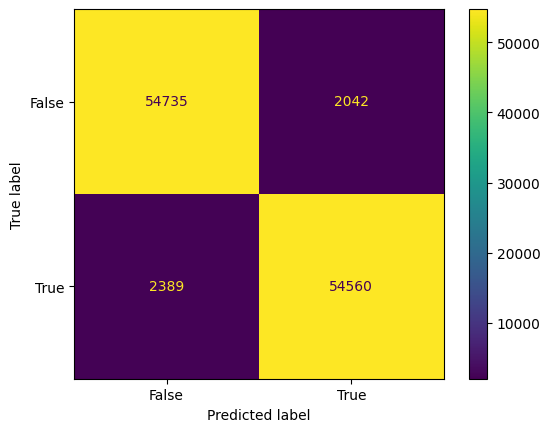

In [58]:
confusion_mat = confusion_matrix(y_test2, predicted_labels)
confusion_matrix4 = confusion_matrix(y_test2, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False, True])

cm_display.plot()
plt.show()